Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 8**: Consider a set of coupled first-order differential equations, typically called 'rate equations'. Let the two ODE's be $$\frac{dy_{1}}{dt}=-k_{1}\,y_{1}$$ and $$\frac{dy_{2}}{dt}=k_{1}\,y_{1} - k_{2}\,y_{2}$$ where $k_{1,2}$ are rate constants. 

**Data**: Take $k_{1}=0.2$ s$^{-1}$ and $k_{2}=0.8$ s$^{-1}$. Initial conditions shall be $y_{1}(0)=100$ and $y_{2}(0)=0$. 

**Task**: Write a function `rateEqns(init, time, k1, k2)` with the array of initial conditions, the time array and the rate constants $k_{1}$ and $k_{2}$ as input. Let the function solve the rate equation ODE's and return the full `odeint` output.

Plot the solutions (with different markers) with suitable axes labels, a legend and a title. Also include a plot of loss feed, i.e. $L(t) = y_{1}(0) - y_{1}(t) - y_{2}(t)$.

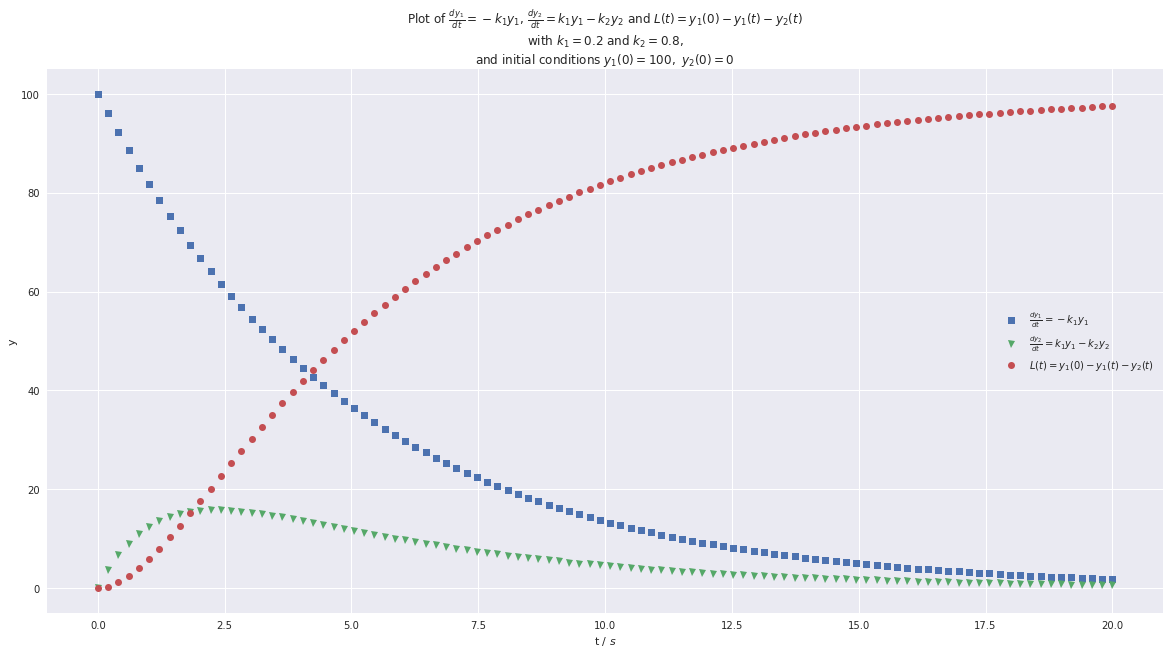

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

initial_conditions = np.array((100, 0))
time_values = np.linspace(0, 20, 100)
k_1 = 0.2
k_2 = 0.8
y1_eqn = r"$\frac{dy_1}{dt} = -k_1y_1$"
y2_eqn = r"$\frac{dy_2}{dt} = k_1y_1 - k_2y_2$"
loss_eqn = r"$L(t) = y_1(0) - y_1(t) - y_2(t)$"


def ode(t, y, k1, k2):
    f_0 = -k1 * y[0]
    f_1 = k1 * y[0] - k2 * y[1]
    return np.array((f_0, f_1))


def rateEqns(init, time, k1, k2):
    odeint_kwargs = {"tfirst": True, "args": (k1, k2)}
    return odeint(ode, init, time, **odeint_kwargs)


solved = rateEqns(initial_conditions, time_values, k_1, k_2)
loss = initial_conditions[0] - solved[:, 0] - solved[:, 1]

plt.style.use("seaborn")
fig, ax1 = plt.subplots(1, figsize=(20, 10))
ax1.plot(time_values, solved[:, 0], "s ", label=y1_eqn)
ax1.plot(time_values, solved[:, 1], "v ", label=y2_eqn)
ax1.plot(time_values, loss, "o ", label=loss_eqn)
ax1.set_xlabel("t / $s$")
ax1.set_ylabel("y")
ax1.set_title(
    f"""Plot of {y1_eqn}, {y2_eqn} and {loss_eqn}
with $k_1 = {k_1}$ and $k_2 = {k_2}$,
and initial conditions $y_1(0) = {initial_conditions[0]},\ y_2(0) = {initial_conditions[1]}$"""
)
ax1.legend()
plt.show()

In [2]:
# Test cell
k1 = 0.2
k2 = 0.8
y10 = 100
y20 = 0
time = np.linspace(0, 20, 40)
init = np.array([y10, y20])
answer = rateEqns(init, time, k1, k2)
# 1
loss = y10 - answer[:, 0] - answer[:, 1]
assert loss[10] > 52.0 and loss[10] < 53.0, "wrong loss value"

In [3]:
# Test cell
assert answer[1, 0] > 90.0 and answer[1, 0] < 90.4, "wrong solution value"
assert answer[1, 1] > 7.9 and answer[1, 1] < 8.0, "wrong solution value"

### Tests 3 marks; Style 1 mark; Plot - 3 marks